In [1]:
import pandas as pd
import wandb
"p"

In [2]:
import pandas as pd
import wandb

# Initialize the WandB API
api = wandb.Api()

# Set your entity and project
entity, project = "naif", "eval_snowclip"

# Define the time range for your runs
start_date = "2024-01-01T00:00:00"
end_date = "2024-01-31T23:59:59"

# Fetch runs within the specified time range
runs = api.runs(entity + "/" + project)
# Lists to store run data
summary_list, config_list, name_list, id_list = [], [], [], []

# Iterate over the runs and collect data
for run in runs:
    # Append summary data, omitting large files
    summary_list.append(run.summary._json_dict)
    
    # Append config data, excluding keys that start with '_'
    config_list.append({k: v for k, v in run.config.items() if not k.startswith("_")})
    
    # Append the human-readable name of the run
    name_list.append(run.name)
    
    # Append the ID of the run
    id_list.append(run.id)

# Check if lists are not empty before creating DataFrame
if summary_list and config_list and name_list and id_list:
    # Create a DataFrame with the collected data
    runs_df = pd.DataFrame({
        "summary": summary_list,
        "config": config_list,
        "name": name_list,
        "id": id_list  # Include the run IDs
    })
    
    # Save the DataFrame to a CSV file
    runs_df.to_csv("project.csv")
else:
    print("No runs found within the specified time range.")
read_csv = pd.read_csv("project.csv")

In [4]:
test = pd.read_csv("project.csv", index_col=0)
test['summary']
test.iloc[0]

summary    {'parameters/graph_86image_encoder.CLIP.vision...
config     {'loss': {'contrastive_queue_loss': {'temperat...
name              GeoCLIP_epoch_4_fold_2_batch_16_queue_2048
id                                                  1ant7qdq
Name: 0, dtype: object

In [13]:
import ast
big_summary = ast.literal_eval(test.iloc[0].summary)
#test.iloc[0].summary[:200]
filtered_summary = {
    key: value for key, value in big_summary.items() 
    if "parameter" not in key and "weight" not in key and "bias" not in key and "gradients" not in key 
        and "distance"  in key and "batch" not in key and "avg" not in key

}

filtered_summary




{'test_sum_error_distance': 7.555102800619217,
 'test_emb_mean_error_distance': 8.37046566821061,
 'val_emb_mean_error_distance': 4.32339193609085,
 'val_mean_error_distance': 507.37662981771655,
 'test_mean_error_distance': 4.53072399675805,
 'val_sum_error_distance': 1006.2444047514954}

In [106]:
[filtered_summary.keys()]
#[filtered_summary.keys()]
#[filtered_summary["test_correct_city"]]
#[big_summary.keys()]
#[filtered_summary["test_mean_error_distance"]]ä
#pd.read_csv("project.csv", index_col=0)

[dict_keys(['test_mean_error_distance', 'val_batch_mean_error_distance', 'test_batch_mean_error_distance', 'val_sum_error_distance', 'test_avg_error_distance', 'val_avg_error_distance', 'test_batch_sum_error_distance', 'test_emb_mean_error_distance', 'val_batch_sum_error_distance', 'val_emb_mean_error_distance', 'val_mean_error_distance', 'test_sum_error_distance'])]

In [3]:
import re
pattern = r'epoch_6.*'
read_csv = pd.read_csv("project.csv")
name_list = read_csv['name']
id_list = read_csv['id']
counter = 0

id_index_list = []
for index, name in enumerate(name_list):
    if(re.search(pattern, name)):
        counter += 1
        id_index_list.append(index)
print(counter) #eftersom sista körningen inte kunde köra till epoch 6 så är de bara 14 körningar

id_list[id_index_list[0]]




14


'cwjmtcnw'

In [40]:
import ast

run = wandb.Api().run('naif/eval_snowclip/cwjmtcnw')

history_df = run.history(samples=5)

# Convert the DataFrame to a dictionary
history_dict = history_df.to_dict(orient='list')

# Now you can print the dictionary keys to see all the metric names
print(history_dict.keys())

#val_batch_mean_error_distance_data = history_dict['val_batch_mean_error_distance']
#print(val_batch_mean_error_distance_data)

dict_keys(['parameters/graph_83image_encoder.CLIP.text_model.encoder.layers.6.layer_norm1.weight', 'parameters/graph_81image_encoder.CLIP.vision_model.encoder.layers.23.self_attn.out_proj.weight', 'parameters/graph_82image_encoder.CLIP.vision_model.encoder.layers.7.layer_norm2.weight', 'parameters/graph_78image_encoder.CLIP.text_model.encoder.layers.8.mlp.fc1.weight', 'parameters/graph_79image_encoder.CLIP.vision_model.encoder.layers.3.self_attn.v_proj.bias', 'parameters/graph_78image_encoder.CLIP.text_model.encoder.layers.6.mlp.fc2.weight', 'parameters/graph_81image_encoder.CLIP.vision_model.encoder.layers.2.layer_norm1.bias', 'parameters/graph_83image_encoder.CLIP.vision_model.encoder.layers.10.self_attn.out_proj.weight', 'parameters/graph_83image_encoder.CLIP.text_model.encoder.layers.8.layer_norm2.bias', 'parameters/graph_80image_encoder.CLIP.vision_model.pre_layrnorm.bias', 'parameters/graph_83image_encoder.CLIP.vision_model.encoder.layers.14.mlp.fc2.weight', 'parameters/graph_83i

In [34]:
history_df.columns

Index(['parameters/graph_83image_encoder.CLIP.text_model.encoder.layers.6.layer_norm1.weight',
       'parameters/graph_81image_encoder.CLIP.vision_model.encoder.layers.23.self_attn.out_proj.weight',
       'parameters/graph_82image_encoder.CLIP.vision_model.encoder.layers.7.layer_norm2.weight',
       'parameters/graph_78image_encoder.CLIP.text_model.encoder.layers.8.mlp.fc1.weight',
       'parameters/graph_79image_encoder.CLIP.vision_model.encoder.layers.3.self_attn.v_proj.bias',
       'parameters/graph_78image_encoder.CLIP.text_model.encoder.layers.6.mlp.fc2.weight',
       'parameters/graph_81image_encoder.CLIP.vision_model.encoder.layers.2.layer_norm1.bias',
       'parameters/graph_83image_encoder.CLIP.vision_model.encoder.layers.10.self_attn.out_proj.weight',
       'parameters/graph_83image_encoder.CLIP.text_model.encoder.layers.8.layer_norm2.bias',
       'parameters/graph_80image_encoder.CLIP.vision_model.pre_layrnorm.bias',
       ...
       'test_batch_mean_correct_city_a

In [36]:
# filter away parameters and weights and biases from the column names
[col for col in history_df.columns if "parameter" not in col and "weight" not in col and "bias" not in col and "gradients" not in col and "batch_" not in col]


['_timestamp',
 'test_sum_error_distance',
 'test_emb_correct_street',
 'val_sum_correct_city',
 'train_loss',
 'test_avg_error_distance',
 'val_sum_correct_street',
 'test_loss',
 'val_emb_correct_city',
 'test_emb_mean_error_distance',
 'epoch',
 'val_emb_correct_street',
 'val_correct_city',
 '_step',
 'test_iter',
 'val_sum_avg_pred',
 'val_avg_pred',
 'test_correct_street',
 'val_mean_error_distance',
 'test_emb_avg_pred',
 'val_gps',
 'val_correct_street',
 'test_sum_correct_city',
 'test_sum_correct_street',
 'test_gps',
 'test_mean_error_distance',
 'test_sum_avg_pred',
 'test_correct_city',
 'val_emb_avg_pred',
 '_runtime',
 'test_majority_vote',
 'val_sum_error_distance',
 'val_avg_error_distance',
 'train_iter',
 'val_majority_vote',
 'test_emb_correct_city',
 'test_avg_pred',
 'val_emb_mean_error_distance']

In [44]:
for key, name in enumerate(history_dict):
    if "sum" in name and history_dict[name][0] :
        print(key)
        print(name)
        print(history_dict[name])

68
test_sum_error_distance
[1.3495545531056046, 2.8369867624006053, nan, nan, nan]
2522
test_sum_correct_city
[True, True, None, None, None]
2765
test_sum_avg_pred
[[41.35499572753906, 2.155189037322998], [41.37603759765625, 2.1606645584106445], None, None, None]


In [140]:


for key, name in enumerate(history_dict):
    if "_mean_error_distance" in name and history_dict[name][0] :
        print(key)
        print(name)
        print(history_dict[name])

f


In [4]:
def write_parquet(index: int, results: pd.DataFrame):
    results.to_parquet(f'{id_list[id_index_list[index]]}.parquet')

def create_all_run_results(response):
    all_run_results = [r for r in response]
    results = pd.DataFrame(all_run_results, index=range(len(all_run_results)))
    return results

In [56]:

print(name_list[id_index_list[1]])
print(id_list[id_index_list[1]])
text = name_list[id_index_list[1]]
if "2048" in text:
    print("yes")

GeoCLIP_epoch_6_fold_0_batch_16_queue_2048
5n1qjlak
yes


In [70]:
id_list

for i in (range(15)):
    print(name_list[id_index_list[i]])


GeoCLIP_epoch_6_fold_1_batch_16_queue_2048
GeoCLIP_epoch_6_fold_0_batch_16_queue_2048
GeoCLIP_epoch_6_fold_2_batch_16_queue_1024
GeoCLIP_epoch_6_fold_1_batch_16_queue_1024
GeoCLIP_epoch_6_fold_0_batch_16_queue_1024
GeoCLIP_epoch_6_fold_2_batch_16_queue_512
GeoCLIP_epoch_6_fold_1_batch_16_queue_512
GeoCLIP_epoch_6_fold_0_batch_16_queue_512
GeoCLIP_epoch_6_fold_2_batch_16_queue_256
GeoCLIP_epoch_6_fold_1_batch_16_queue_256
GeoCLIP_epoch_6_fold_0_batch_16_queue_256
GeoCLIP_epoch_6_fold_2_batch_16_queue_128
GeoCLIP_epoch_6_fold_1_batch_16_queue_128
GeoCLIP_epoch_6_fold_0_batch_16_queue_128


IndexError: list index out of range

In [72]:
def extract_queue_size(run_name: str) -> int:
    # Extract the queue size from the run name
    queue_size = int(run_name.split('_')[-1])
    return queue_size


Run ID: cwjmtcnw, Queue Size: 2048
Run ID: 5n1qjlak, Queue Size: 2048
Run ID: 4s6gvjco, Queue Size: 1024
Run ID: pdu5mqw1, Queue Size: 1024
Run ID: jc5i9wqx, Queue Size: 1024
Run ID: wg3v9bki, Queue Size: 512
Run ID: qo5ifz28, Queue Size: 512
Run ID: 3csm0ha5, Queue Size: 512
Run ID: ttumgsg5, Queue Size: 256
Run ID: gbxrila5, Queue Size: 256
Run ID: 5ux1rtpo, Queue Size: 256
Run ID: d7qg2moz, Queue Size: 128
Run ID: vsxflmog, Queue Size: 128
Run ID: 8qxxesnq, Queue Size: 128


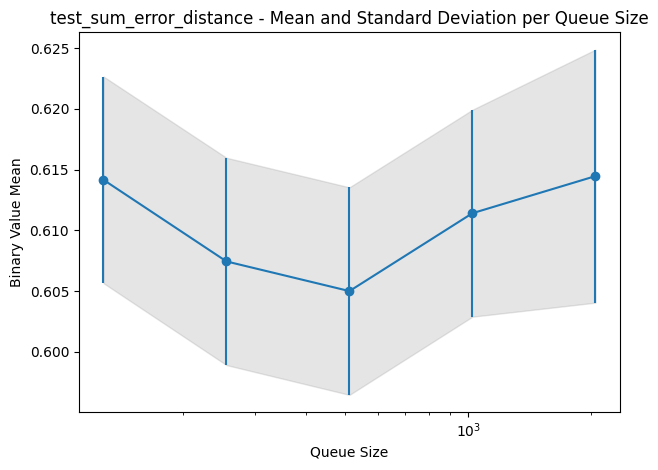

In [74]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Initialize the WandB API
api = wandb.Api(timeout=40)

# Define the keys you want to loop through
keys_to_analyze = [
    'test_sum_error_distance',
    'test_emb_mean_error_distance',
    'val_emb_mean_error_distance',
    'val_mean_error_distance',
    'test_mean_error_distance',
    'val_sum_error_distance'
]

# Initialize a dictionary to store the binary values for each run and key
binary_values_dict = {key: {128: [], 256: [], 512: [], 1024: [], 2048: []} for key in keys_to_analyze}
means_dict = {}
std_devs_dict = {}

# Loop through all the runs you want
for i in range(len(id_index_list)):
    run_id = id_list[id_index_list[i]]
    run_name = name_list[id_index_list[i]]
    queue_size = extract_queue_size(run_name)
    print(f'Run ID: {run_id}, Queue Size: {queue_size}')
    run = api.run(f'naif/eval_snowclip/{run_id}')

    # New outer loop to go through each key
    for key in keys_to_analyze:
        history = run.scan_history(keys=[key])

        # Convert values to binary based on the condition
        binary_values = [0 if item[key] > 25 else 1 for item in history]

        # Add the binary values for this run to the list
        binary_values_dict[key][queue_size].extend(binary_values)

# After collecting all the binary values
for key, queue_dict in binary_values_dict.items():
    for queue_size, binary_values in queue_dict.items():
        if binary_values:
            # Convert the binary values list to a pandas DataFrame
            df = pd.DataFrame(binary_values, columns=['binary_value'])
            # Save the DataFrame to a Parquet file
            df.to_parquet(f'{key}_queue_size_{queue_size}.parquet')

    # Plot the mean and standard deviation for 'test_sum_error_distance' to verify the data
    if key == 'test_sum_error_distance':
        for queue_size, values in queue_dict.items():
            if values:  # Check if the list is not empty
                mean_binary = np.mean(values)
                std_binary = np.std(values)
                std_binary = std_binary/np.sqrt(len(values))  # Standard error of the mean
                
                means_dict[queue_size] = mean_binary
                std_devs_dict[queue_size] = std_binary

        # Plotting the mean with standard deviation
        queue_sizes = sorted(means_dict.keys())
        means = [means_dict[q] for q in queue_sizes]
        std_devs = [std_devs_dict[q] for q in queue_sizes]

 

def extract_queue_size(run_name: str) -> int:
    # Extract the queue size from the run name
    queue_size = int(run_name.split('_')[-1])
    return queue_size


In [6]:
#TODO make a loop that goes through id_list to get all runs

for i in id_index_list:
    if i < 2:
        continue
    run = wandb.Api(timeout=40).run(f'naif/eval_snowclip/{id_list[id_index_list[i]]}'  )
    response = run.scan_history()
    results = create_all_run_results(response)
    write_parquet(i, results)


IndexError: list index out of range

In [12]:
run = wandb.Api(timeout=40).run(f'naif/eval_snowclip/{id_list[id_index_list[3]]}')
response = run.scan_history()
#results = create_all_run_results(response)
#write_parquet(i, results)


In [13]:

all_run_results = [r for r in response]
#results = pd.DataFrame(all_run_results, index=range(len(all_run_results)))

KeyboardInterrupt: 

In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def plot_key_visualization(key, queue_sizes, means, std_devs):
    plt.errorbar(queue_sizes, means, yerr=std_devs, fmt='-o')
    plt.fill_between(queue_sizes, np.array(means) - np.array(std_devs), np.array(means) + np.array(std_devs), color='gray', alpha=0.2)
    plt.title(f'{key} - Mean and Standard Error per Queue Size')
    plt.xlabel('Queue Size')
    plt.ylabel('Binary Value Mean')
    plt.xscale('log')
    
    # Set the x-axis to show specific queue sizes
    plt.xticks(queue_sizes, labels=queue_sizes)
    
    plt.tight_layout()
    file_path = os.path.join(save_directory, f'{key}_visualization.png')
    plt.savefig(file_path)  # Save the plot as a PNG file
    print(file_path)
    plt.clf()  # Clear the current figure for the next plot
    plt.close()

binary_values_dict = {key: {128: [], 256: [], 512: [], 1024: [], 2048: []} for key in keys_to_analyze}
means_dict = {}
std_devs_dict = {}
save_directory = r'C:\Users\Naifh\code\viz_data'

parquet_directory = r'C:\Users\Naifh\code\viz_data'
for filename in os.listdir(parquet_directory):
    if filename.endswith(".parquet"):
        key = filename.split('_queue_size')[0]  # Extract the key from the filename
        queue_size = int(filename.split('_queue_size_')[1].split('.parquet')[0])  # Extract the queue size from the filename
        
        df = pd.read_parquet(os.path.join(parquet_directory, filename))

        mean = df['binary_value'].mean()
        std_binary = df['binary_value'].std() / np.sqrt(len(df))


        if key not in means_dict:
            means_dict[key] = {}
            std_devs_dict[key] = {}
        print(mean)
        means_dict[key][queue_size] = mean
        std_devs_dict[key][queue_size] = std_binary

for keys in means_dict:

    queue_sizes = sorted(means_dict[keys].keys())
    means = [means_dict[keys][q] for q in queue_sizes]
    std_devs = [std_devs_dict[keys][q] for q in queue_sizes]
    plot_key_visualization(keys, queue_sizes, means, std_devs)
    
        

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.